In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import re
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
import plusmodules as pm
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

![p1](p1.gif)

![](p2.jpeg)

![](p3.png)

![](p4.png)

![](p5.png)

# Index
1. **Loading the dataset:** Load the data and import the libraries. <br>
2. **Data Cleaning:** <br>
 - Deleting redundant columns.
 - Renaming the columns.
 - Dropping duplicates.
 - Cleaning individual columns.
 - Remove the NaN values from the dataset
 - #Some Transformations
3. **Text Preprocessing**
 - Cleaning unnecessary words in the reviews
 - Removing links and other unncessary items
 - Removing Symbols
4. **Recommendation System**

In [32]:
#reading the dataset
zomato_real=pd.read_csv("zomato.csv")
zomato_real.head() # prints the first N rows of a DataFrame

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [34]:
zomato.isnull().sum()

address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
Mean Rating     0
dtype: int64

In [4]:
zomato_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

### Data Cleaning and Feature Engineering

In [5]:
#Deleting Unnnecessary Columns
zomato=zomato_real.drop(['url','dish_liked','phone'],axis=1) #Dropping the column "dish_liked", "phone", "url" and saving the new dataset as "zomato"

In [6]:
#Removing the Duplicates
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

In [7]:
#Remove the NaN values from the dataset
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)
zomato.info() #.info() function is used to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [8]:
#Reading Column Names
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [9]:
#Changing the column names
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [10]:
#Some Transformations
zomato['cost'] = zomato['cost'].astype(str) #Changing the cost to string
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','')) #Using lambda function to replace ',' from cost
zomato['cost'] = zomato['cost'].astype(float) # Changing the cost to Float
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [11]:
#Reading Rate of dataset
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
#Removing '/5' from Rates
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')
zomato['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [13]:
# Adjust the column names
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)
zomato.cost.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199., 1100., 1600.,  230.,  130.,
       1700., 1350., 2200., 1400., 2000., 1800., 1900.,  180.,  330.,
       2500., 2100., 3000., 2800., 3400.,   50.,   40., 1250., 3500.,
       4000., 2400., 2600., 1450.,   70., 3200.,  240., 6000., 1050.,
       2300., 4100.,  120., 5000., 3700., 1650., 2700., 4500.,   80.])

In [14]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [15]:
zomato['city'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [16]:
## Checking Null values
zomato.isnull().sum()

address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

In [17]:
## Computing Mean Rating
restaurants = list(zomato['name'].unique())
zomato['Mean Rating'] = 0

for i in range(len(restaurants)):
    zomato['Mean Rating'][zomato['name'] == restaurants[i]] = zomato['rate'][zomato['name'] == restaurants[i]].mean()

In [18]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.118182
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.100000
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.800000
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.700000
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.800000


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (1,5))

zomato[['Mean Rating']] = scaler.fit_transform(zomato[['Mean Rating']]).round(2)

zomato.sample(3)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating
24011,"80, Boss Square, Ground Floor, 1st Cross, 2nd ...",The Cuboidal,True,False,3.6,16,BTM,Quick Bites,"Fast Food, Beverages, Sandwich",300.0,"[('Rated 4.0', 'RATED\n When you planing for ...","['Cheese Garlic Bread', 'Paneer Tikka Pizza', ...",Delivery,Koramangala 5th Block,3.32
39927,"Opposite Assez Apartment, Gear School Road, Be...",Cuppa,False,False,3.7,33,Bellandur,Cafe,"Fast Food, Street Food, Beverages",400.0,"[('Rated 4.0', ""RATED\n Heya, what's popping?...",[],Dine-out,Sarjapur Road,2.99
33492,"1, 1st Floor, Akhitaan, Kundanahalli Cross Roa...",Mast Kalandar,False,False,2.4,229,Brookefield,Casual Dining,North Indian,450.0,"[('Rated 3.0', 'RATED\n This came out as an s...",[],Dine-out,Marathahalli,1.72


# Text Preprocessing

Some of the common text preprocessing / cleaning steps are:

 - Lower casing
 - Removal of Punctuations
 - Removal of Stopwords
 - Removal of URLs
 - Spelling correction

In [20]:
# 5 examples of these columns before text processing:
zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
20035,"[('Rated 4.0', ""RATED\n When it comes to biry...","Biryani, Kebab"
37084,"[('Rated 2.0', 'RATED\n I had ordered for a S...","North Indian, Continental, Chinese, Asian, Thai"
32424,"[('Rated 4.0', 'RATED\n Have ordered red velv...","Bakery, Desserts"
35172,"[('Rated 5.0', ""RATED\n A big salute to this ...","Chinese, North Indian, Mangalorean"
12617,"[('Rated 5.0', 'RATED\n Visited this place ar...","Biryani, Fast Food, Rolls, Momos"


In [21]:
## Lower Casing
zomato["reviews_list"] = zomato["reviews_list"].str.lower()
zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
25785,"[('rated 3.0', ""rated\n visited this place ye...","Kerala, Seafood, Chinese, Biryani, Juices"
21257,"[('rated 3.0', ""rated\n ordered chicken coron...","Salad, Healthy Food"
17256,"[('rated 4.0', 'rated\n the view cafe\nthe fo...","Cafe, Italian, Chinese, Beverages"
28869,"[('rated 4.0', 'rated\n so today i have order...","Bakery, Desserts"
38447,"[('rated 4.0', ""rated\n faasos has come up wi...","North Indian, Biryani, Fast Food"


In [22]:
## Removal of Puctuations
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_punctuation(text))
zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
27716,rated 40 ratedn heaven for the people for who...,"North Indian, Cafe, Fast Food, Beverages"
17870,rated 50 ratedn pani puri pathaka what an inv...,"Ice Cream, Desserts"
31535,rated 10 ratedn went here today morning there...,"Bakery, Desserts, Beverages"
16653,rated 50 ratedn great food and must try the g...,"Mithai, South Indian, Street Food, Fast Food"
7348,rated 40 ratedn pretty decent place right off...,Finger Food


In [23]:
## Removal of Stopwords
import nltk
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_stopwords(text))

In [24]:
## Removal of URLS
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_urls(text))

In [25]:
zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
36971,rated 40 ratedn bombay vada pav corner small u...,Street Food
20312,rated 50 ratedn thalis restrau worth moneynfoo...,"North Indian, South Indian, Chinese"
36857,rated 10 ratedn disappointed service dining ar...,"Mughlai, Chinese"
40024,rated 50 ratedn good place hangoutthe spread g...,"Continental, Italian, North Indian, Mexican"
16263,rated 10 ratedn firstly satisfied overall orde...,"Biryani, North Indian"


In [26]:
# RESTAURANT NAMES:
restaurant_names = list(zomato['name'].unique())
restaurant_names

['Jalsa',
 'Spice Elephant',
 'San Churro Cafe',
 'Addhuri Udupi Bhojana',
 'Grand Village',
 'Timepass Dinner',
 'Rosewood International Hotel - Bar & Restaurant',
 'Onesta',
 'Penthouse Cafe',
 'Smacznego',
 'Cafã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley',
 'Cafe Shuffle',
 'The Coffee Shack',
 'Caf-Eleven',
 'Cafe Vivacity',
 'Catch-Up-Ino',
 "Kirthi'S Biryani",
 'T3H Cafe',
 '360 Atoms Restaurant And Cafe',
 'The Vintage Cafe',
 'Woodee Pizza',
 'Cafe Coffee Day',
 'My Tea House',
 'Hide Out Cafe',
 'Cafe Nova',
 'Coffee Tindi',
 'Sea Green Cafe',
 'Cuppa',
 "Srinathji'S Cafe",
 'Redberrys',
 'Foodiction',
 'Sweet Truth',
 'Ovenstory Pizza',
 'Faasos',
 'Behrouz Biryani',
 'Fast And Fresh',
 'Szechuan Dragon',
 'Empire Restaurant',
 'Maruthi Davangere Benne Dosa',
 'Chaatimes',
 'Havyaka Mess',
 "Mcdonald'S",
 "Domino'S Pizza",
 'Hotboxit',
 'Kitchen Garden',
 'Recipe',
 'Beijing Bites',
 'Tasty Bytes',
 'Petoo',
 'Shree Cool Point'

In [27]:
# Predefined funtion to see which words have been used the most 
def get_top_words(column, top_nu_of_words, nu_of_word):
    
    vec = CountVectorizer(ngram_range= nu_of_word, stop_words='english')
    
    bag_of_words = vec.fit_transform(column)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:top_nu_of_words]

In [28]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,[],Buffet,Banashankari,3.99
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,rated 40 ratedn dinner family turned good choo...,[],Buffet,Banashankari,3.97
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,rated 30 ratedn ambience good enough pocket fr...,[],Buffet,Banashankari,3.58
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,rated 40 ratedn great food proper karnataka st...,[],Buffet,Banashankari,3.45
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,rated 40 ratedn good restaurant neighbourhood ...,[],Buffet,Banashankari,3.58


In [29]:
zomato.sample(5)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating
2606,"2466, 24th Cross Road, Siddanna Layout, Stage ...",Cocoa Bakes,True,False,3.6,14,Banashankari,Bakery,"Bakery, Desserts",350.0,rated 40 ratedn cute outlet near bda complex v...,[],Desserts,Basavanagudi,3.32
31609,"18/2, Temple Road, 10th Cross, Malleshwaram, B...",Mumbai Spice,True,False,3.7,100,Malleshwaram,Quick Bites,"North Indian, Chinese",400.0,rated 30 ratedn ordered meals taste ok phulka ...,"['Aloo Paratha', 'Gobi Manchurian', 'Veg Fried...",Delivery,Malleshwaram,3.45
27589,"63, 5th Block, Jyoti Nivas College Road, Koram...",Wtf,True,False,4.1,96,Koramangala 5th Block,Cafe,"Cafe, Continental",600.0,rated 50 ratedn visited today evening coffee s...,[],Cafes,Koramangala 7th Block,3.97
27714,"36, 29th Main Road, Mahadeshwara Nagar, Stage ...",Bathinda Junction,True,False,3.8,371,BTM,Casual Dining,North Indian,600.0,rated 50 ratedn favourite place khatiya system...,"['Punjabi Paneer', 'Paneer Butter Masala', 'Ka...",Delivery,Koramangala 7th Block,3.83
13932,"484, Signature Square, CMH Road, Indiranagar, ...",Paradise,True,False,4.1,3238,Indiranagar,Casual Dining,"Biryani, North Indian, Kebab",800.0,rated 40 ratedn ordered royal chicken biryani ...,[],Delivery,Indiranagar,3.86


In [30]:
zomato.shape

(41237, 15)

In [31]:
zomato.isnull().sum()

address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
Mean Rating     0
dtype: int64

In [30]:
dt=zomato.copy()

<AxesSubplot:ylabel='online_order'>

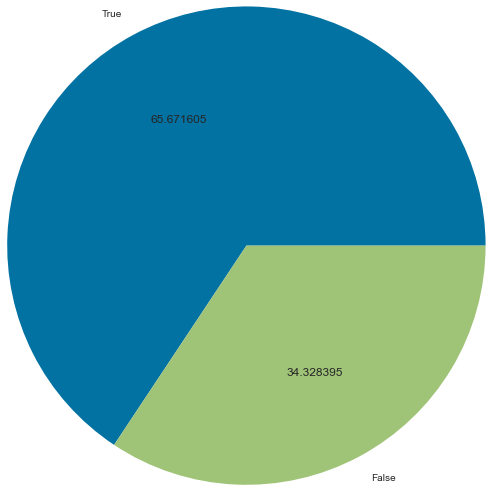

In [31]:
a=dt['online_order'].value_counts()
a.plot(kind='pie',autopct='%2f',radius=2)

<AxesSubplot:ylabel='book_table'>

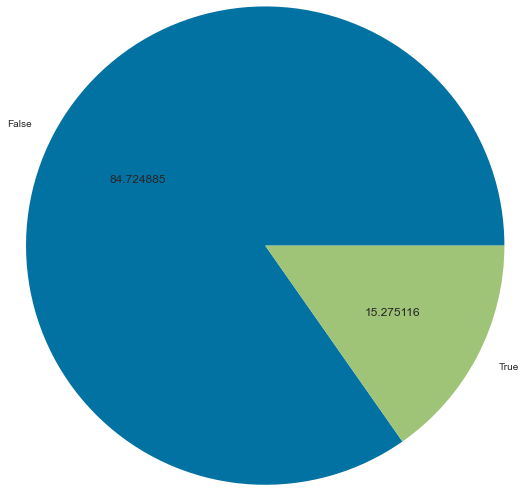

In [32]:
a=dt['book_table'].value_counts()
a.plot(kind='pie',autopct='%2f',radius=2)

<AxesSubplot:ylabel='rate'>

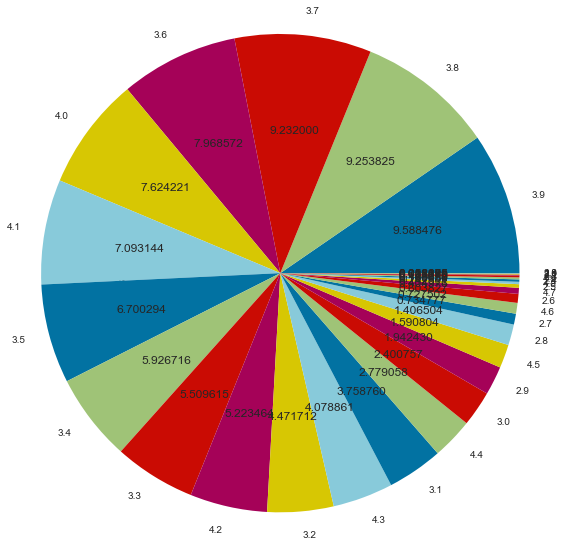

In [33]:
a=dt['rate'].value_counts()
a.plot(kind='pie',autopct='%2f',radius=2)

<AxesSubplot:ylabel='location'>

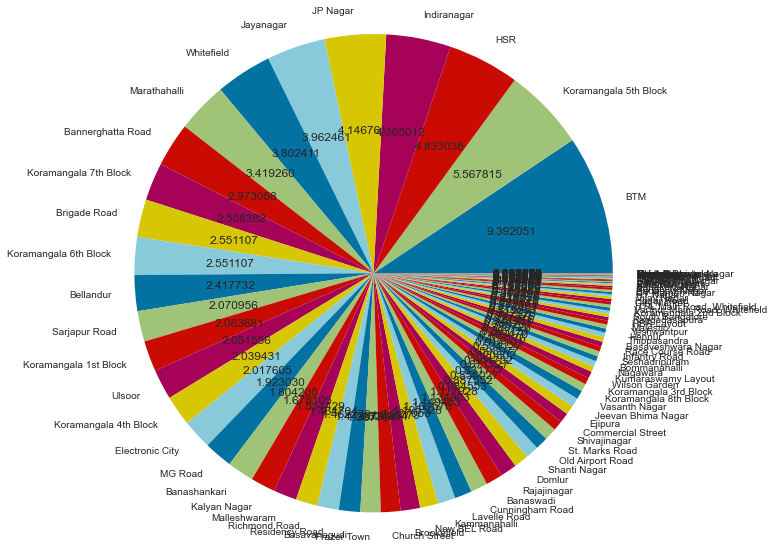

In [34]:
a=dt['location'].value_counts()
a.plot(kind='pie',autopct='%2f',radius=2)

<AxesSubplot:ylabel='rest_type'>

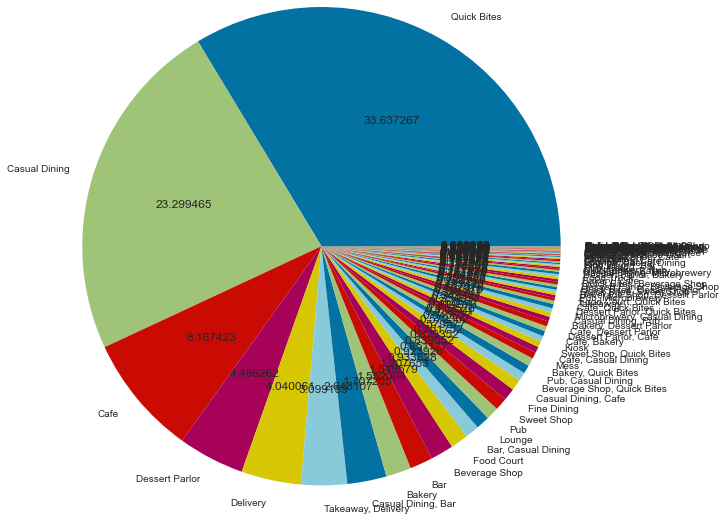

In [35]:
a=dt['rest_type'].value_counts()
a.plot(kind='pie',autopct='%2f',radius=2)

<AxesSubplot:ylabel='type'>

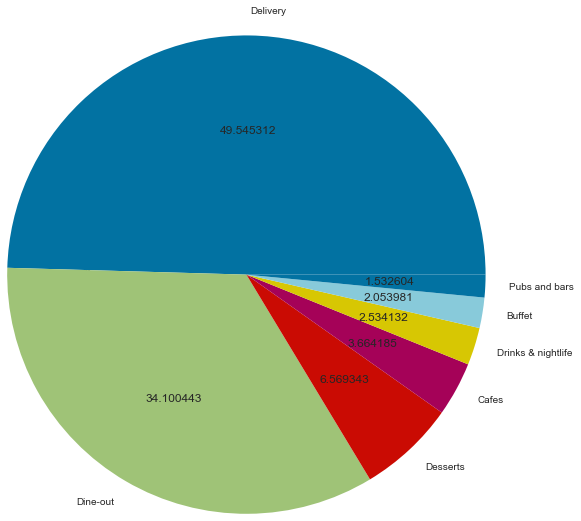

In [36]:
a=dt['type'].value_counts()
a.plot(kind='pie',autopct='%2f',radius=2)

<AxesSubplot:ylabel='cost'>

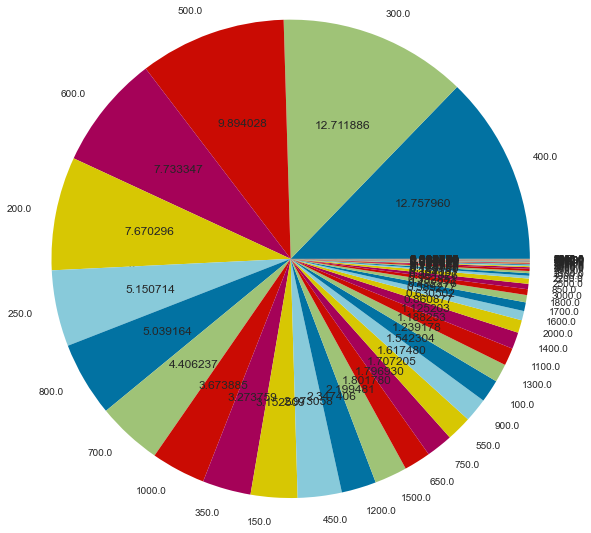

In [37]:
a=dt['cost'].value_counts()
a.plot(kind='pie',autopct='%2f',radius=2)

In [38]:
## Computing Mean Rating
restaurants = list(dt['name'].unique())
dt['Mean Rating'] = 0

for i in range(len(restaurants)):
    dt['Mean Rating'][dt['name'] == restaurants[i]] = dt['rate'][dt['name'] == restaurants[i]].mean()

In [39]:
dt.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,[],Buffet,Banashankari,4.118182
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,rated 40 ratedn dinner family turned good choo...,[],Buffet,Banashankari,4.100000
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,rated 30 ratedn ambience good enough pocket fr...,[],Buffet,Banashankari,3.800000
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,rated 40 ratedn great food proper karnataka st...,[],Buffet,Banashankari,3.700000
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,rated 40 ratedn good restaurant neighbourhood ...,[],Buffet,Banashankari,3.800000


In [40]:
from sklearn.preprocessing import LabelEncoder

# instantiate the encoder
labelencoder = LabelEncoder()

# fit the encoder on 'Outlet_Size' 
dt['online_order'] = labelencoder.fit_transform(dt.online_order)

# display first 5 observations
dt.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,[],Buffet,Banashankari,4.118182
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,rated 40 ratedn dinner family turned good choo...,[],Buffet,Banashankari,4.100000
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,rated 30 ratedn ambience good enough pocket fr...,[],Buffet,Banashankari,3.800000
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,rated 40 ratedn great food proper karnataka st...,[],Buffet,Banashankari,3.700000
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,rated 40 ratedn good restaurant neighbourhood ...,[],Buffet,Banashankari,3.800000


In [41]:
dfc=dt.iloc[:,[4,9]]

In [42]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
dfcs = ss.fit_transform(dfc)
dfcs = pd.DataFrame(dfcs, columns=dfc.columns)

In [43]:
dfcs.head()

,rate,cost
0,0.904418,0.421753
1,0.904418,0.421753
2,0.222645,0.421753
3,-0.004613,-0.653663
4,0.222645,-0.008413


# K Means Hierarchical Clustering 
    
    Deciding the No. of Clusters

![](p11.png)

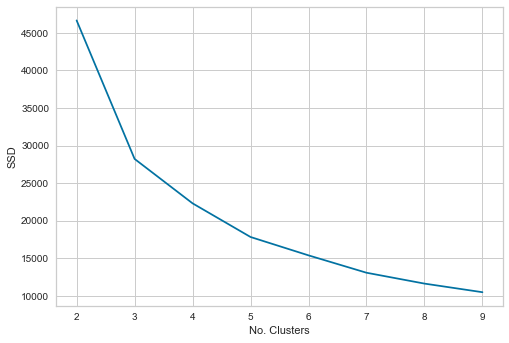

In [45]:
ssd = []
sscore = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=4)
    kmeans.fit(dfcs)
    ssd.append(kmeans.inertia_)
    ss = silhouette_score(dfcs, kmeans.labels_)
    sscore.append(ss)
    
plt.plot(range(2,10), ssd)
plt.xlabel('No. Clusters')
plt.ylabel('SSD')
plt.show()

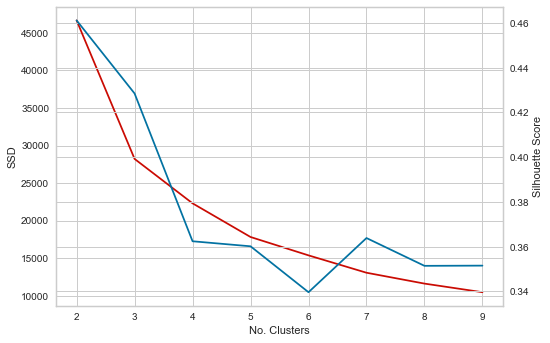

In [46]:
fig, ax = plt.subplots()
ax.plot(range(2,10), ssd, 'r')
ax.set_xlabel('No. Clusters')
ax.set_ylabel('SSD')
ax1 = ax.twinx()
ax1.plot(range(2,10), sscore)
ax1.set_ylabel('Silhouette Score')
plt.show()

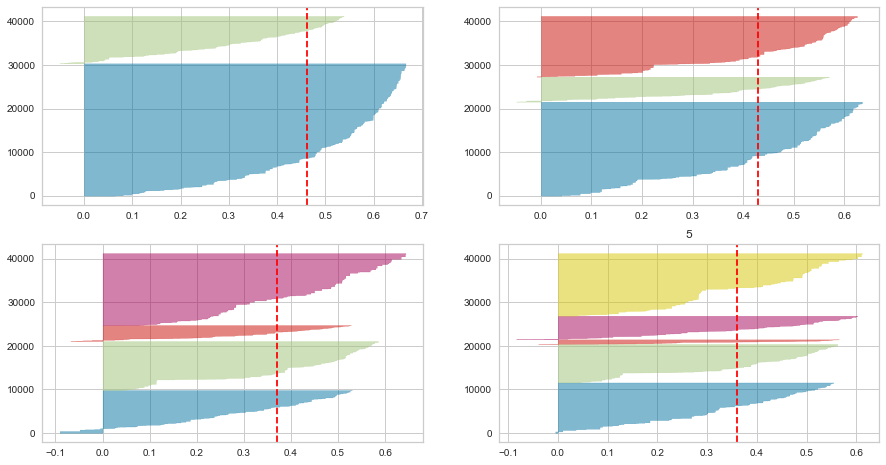

In [47]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    plt.title(i)# I am not able to print the title for each graph pls look into it 
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod],title=a)
    visualizer.fit(dfcs)

In [48]:
dfc.describe()

,rate,cost
count,41237.000000,41237.000000
mean,3.702030,603.911681
std,0.440034,464.942234
min,1.800000,40.000000
25%,3.400000,300.000000
50%,3.700000,500.000000
75%,4.000000,750.000000
max,4.900000,6000.000000


In [49]:
dfc['rate'].quantile(np.arange(0.5, 1, 0.05))

0.50    3.7
0.55    3.8
0.60    3.8
0.65    3.9
0.70    3.9
0.75    4.0
0.80    4.1
0.85    4.2
0.90    4.2
0.95    4.4
Name: rate, dtype: float64

In [50]:
dfc.shape

(41237, 2)

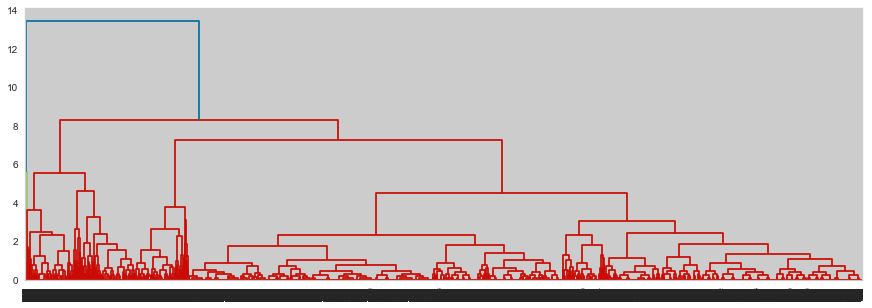

In [51]:
plt.figure(figsize=(15,5))
mergings = linkage(dfcs, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()


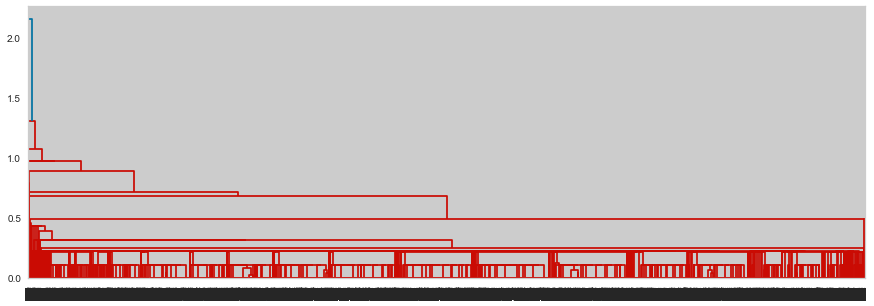

In [52]:
plt.figure(figsize=(15,5))
mergings = linkage(dfcs, method='single', metric='euclidean')
dendrogram(mergings)
plt.show()

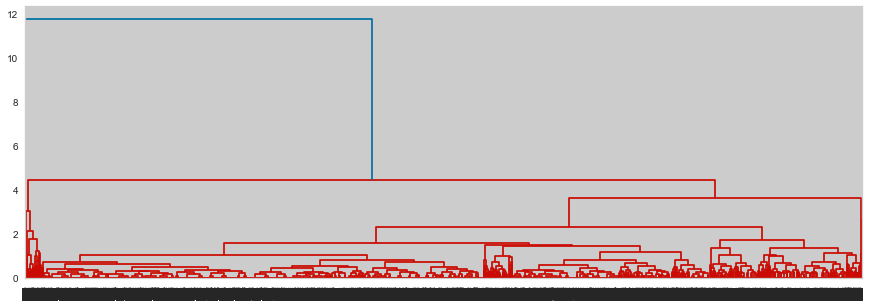

In [53]:
plt.figure(figsize=(15,5))
mergings = linkage(dfcs, method='average', metric='euclidean')
dendrogram(mergings)
plt.show()

In [54]:
mergings = linkage(dfcs, method='complete', metric='euclidean')
cluster_cut = pd.Series(cut_tree(mergings, n_clusters=3).reshape(-1,))

In [55]:
dt['Cluster'] = cluster_cut

In [56]:
dt.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating,Cluster
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,[],Buffet,Banashankari,4.118182,0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,rated 40 ratedn dinner family turned good choo...,[],Buffet,Banashankari,4.100000,0
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,rated 30 ratedn ambience good enough pocket fr...,[],Buffet,Banashankari,3.800000,0
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,rated 40 ratedn great food proper karnataka st...,[],Buffet,Banashankari,3.700000,0
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,rated 40 ratedn good restaurant neighbourhood ...,[],Buffet,Banashankari,3.800000,0


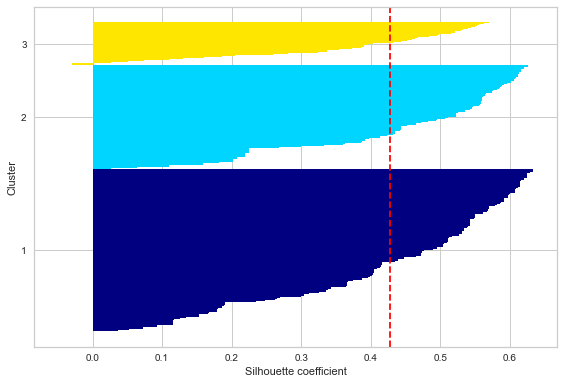

In [57]:
import plusmodules as pm
pm.svisualizer(dfcs, 3)

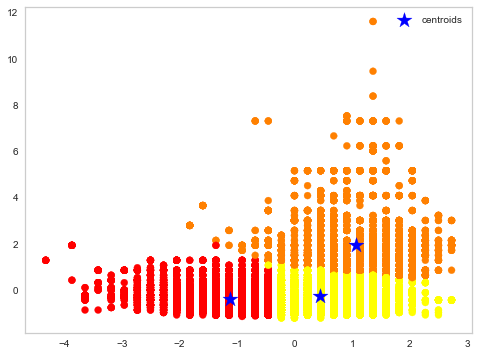

In [58]:
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=2)
y_km = km.fit_predict(dfcs)

plt.figure(figsize=(8, 6))
plt.scatter(dfcs.iloc[:,0], dfcs.iloc[:,1],c=km.labels_.astype(float),cmap = plt.cm.autumn )

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='blue', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [59]:
dt['Cluster'].value_counts(normalize=True)

0    0.868977
1    0.129156
2    0.001867
Name: Cluster, dtype: float64

In [60]:
dt.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating,Cluster
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,[],Buffet,Banashankari,4.118182,0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,rated 40 ratedn dinner family turned good choo...,[],Buffet,Banashankari,4.100000,0
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,rated 30 ratedn ambience good enough pocket fr...,[],Buffet,Banashankari,3.800000,0
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,rated 40 ratedn great food proper karnataka st...,[],Buffet,Banashankari,3.700000,0
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,rated 40 ratedn good restaurant neighbourhood ...,[],Buffet,Banashankari,3.800000,0


In [61]:
dt.groupby('Cluster')['online_order', 'rate','cost','votes'].agg('mean')

,online_order,rate,cost,votes
Cluster,,,,
0,0.690769,3.643875,461.757158,238.589747
1,0.437101,4.085730,1513.912880,1120.537364
2,0.000000,4.225974,3815.584416,385.090909


In [62]:
dt.groupby('Cluster')['online_order', 'rate','cost','votes'].agg('median')

,online_order,rate,cost,votes
Cluster,,,,
0,1,3.7,400.0,58
1,0,4.1,1400.0,518
2,0,4.3,3700.0,365


![](p6.png)

![](p7.png)

# Popularity  Based Recommendation System 

![](p8.png)

In [63]:
dt.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating,Cluster
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,[],Buffet,Banashankari,4.118182,0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,rated 40 ratedn dinner family turned good choo...,[],Buffet,Banashankari,4.100000,0
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,rated 30 ratedn ambience good enough pocket fr...,[],Buffet,Banashankari,3.800000,0
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,rated 40 ratedn great food proper karnataka st...,[],Buffet,Banashankari,3.700000,0
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,rated 40 ratedn good restaurant neighbourhood ...,[],Buffet,Banashankari,3.800000,0


In [64]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41237 entries, 0 to 41236
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       41237 non-null  object 
 1   name          41237 non-null  object 
 2   online_order  41237 non-null  int64  
 3   book_table    41237 non-null  bool   
 4   rate          41237 non-null  float64
 5   votes         41237 non-null  int64  
 6   location      41237 non-null  object 
 7   rest_type     41237 non-null  object 
 8   cuisines      41237 non-null  object 
 9   cost          41237 non-null  float64
 10  reviews_list  41237 non-null  object 
 11  menu_item     41237 non-null  object 
 12  type          41237 non-null  object 
 13  city          41237 non-null  object 
 14  Mean Rating   41237 non-null  float64
 15  Cluster       41237 non-null  int32  
dtypes: bool(1), float64(3), int32(1), int64(2), object(9)
memory usage: 4.6+ MB


In [65]:
recommend_table=dt.groupby('name').agg({'rate':'mean','cost':'mean'})
recommend_table=recommend_table.sort_values('rate',ascending=False).head(10)
recommend_table.dropna()
recommend_table

,rate,cost
name,,
Asia Kitchen By Mainland China,4.900000,1500.000000
SantãÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine,4.900000,1000.000000
Byg Brewski Brewing Company,4.900000,1600.000000
Punjab Grill,4.871429,2000.000000
Belgian Waffle Factory,4.844828,400.000000
Flechazo,4.800000,1400.000000
O.G. Variar & Sons,4.800000,200.000000
The Pizza Bakery,4.800000,1200.000000
Ab'S - Absolute Barbecues,4.789474,1568.421053


In [66]:
recommend_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Asia Kitchen By Mainland China to Biergarten
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rate    10 non-null     float64
 1   cost    10 non-null     float64
dtypes: float64(2)
memory usage: 240.0+ bytes


In [67]:
recommend_table=dt.groupby('name').agg({'rate':'mean','cost':'mean'})
recommend_table['rate']= recommend_table[(recommend_table['rate']>3.5)&(recommend_table['cost']>450)&(recommend_table['cost']<500)]
recommend_table=recommend_table.sort_values(['rate','cost'],ascending=[False,True]).head(10)
recommend_table

,rate,cost
name,,
Eat.Fit,4.378723,457.446809
Leon Grill,4.209524,494.047619
Icebreakers,4.184211,468.421053
Happy Belly Bakes,4.152000,470.000000
Cream Stone,4.138235,476.470588
The Good Grain,4.100000,490.000000
Roll Over,4.072727,486.363636
Flavor Of Tibet,4.000000,480.000000
Recipe,4.000000,483.333333


![](p9.png)

# Memory Based Recommendation System

![](p12.png)

In [68]:
da=dt.copy()
da.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating,Cluster
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,[],Buffet,Banashankari,4.118182,0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,rated 40 ratedn dinner family turned good choo...,[],Buffet,Banashankari,4.100000,0
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,rated 30 ratedn ambience good enough pocket fr...,[],Buffet,Banashankari,3.800000,0
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,rated 40 ratedn great food proper karnataka st...,[],Buffet,Banashankari,3.700000,0
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,rated 40 ratedn good restaurant neighbourhood ...,[],Buffet,Banashankari,3.800000,0


In [69]:
da1=da.iloc[:,[1,4,5,6]]
da1=da1.loc[da1.location=='BTM']
#da1=da1.location)=='BTM']
da1.insert(0,'ID',range(0,len(da1)))
da1.head()

,ID,name,rate,votes,location
742,0,Sankranthi Veg Restaurant,3.0,102,BTM
776,1,Hearts Unlock Cafe,3.2,11,BTM
777,2,Eat.Fit,4.5,1178,BTM
778,3,Sai Abhiruchi,3.7,335,BTM
779,4,Capsicum Family Restaurant,3.8,254,BTM


In [70]:
da1.describe()

,ID,rate,votes
count,3873.000000,3873.000000,3873.000000
mean,1936.000000,3.571547,147.737671
std,1118.183125,0.372909,403.263648
min,0.000000,2.400000,0.000000
25%,968.000000,3.400000,15.000000
50%,1936.000000,3.600000,39.000000
75%,2904.000000,3.800000,118.000000
max,3872.000000,4.900000,6490.000000


In [71]:
da2=da1.iloc[:,[0,1,2,3]]
da2.head()

,ID,name,rate,votes
742,0,Sankranthi Veg Restaurant,3.0,102
776,1,Hearts Unlock Cafe,3.2,11
777,2,Eat.Fit,4.5,1178
778,3,Sai Abhiruchi,3.7,335
779,4,Capsicum Family Restaurant,3.8,254


In [72]:
rest_rate=da2.loc[da2.votes>=118]
rest_rate.head()

,ID,name,rate,votes
777,2,Eat.Fit,4.5,1178
778,3,Sai Abhiruchi,3.7,335
779,4,Capsicum Family Restaurant,3.8,254
783,5,Hiyar Majhe Kolkata,4.0,244
787,6,Sri Lakshmi Dhaba,2.9,255


In [73]:
rest_rate.shape

(977, 4)

In [74]:
rest_rating_pivot = rest_rate.pivot(index='name', columns='ID', values='rate')
rest_rating_pivot = rest_rating_pivot.fillna(0)
rest_rating_pivot.head()

ID,2,3,4,5,6,7,8,11,12,13,...,3765,3771,3804,3806,3848,3852,3863,3864,3867,3868
name,,,,,,,,,,,,,,,,,,,,,
"3B'S - Buddies, Bar & Barbecues",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.4,0.0,4.4,0.0
A2B - Adyar Ananda Bhavan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ab'S - Absolute Barbecues,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abhiruchi Hotel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Al-Bek,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
rest_rating_pivot.shape

(119, 977)

In [76]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine')
model_knn.fit(rest_rating_pivot)

NearestNeighbors(metric='cosine')

In [77]:
distances, indices = model_knn.kneighbors(rest_rating_pivot, n_neighbors=4)

In [78]:
rec = pd.DataFrame(indices, columns=['rest0', 'rest1', 'rest2', 'rest3',])
rec.head()

,rest0,rest1,rest2,rest3
0,0,79,80,81
1,1,79,77,81
2,2,80,78,82
3,3,79,80,82
4,4,79,80,82


In [79]:
rec2 = rec.copy()
for i in range(0, 4):
    rest = pd.DataFrame(rest_rating_pivot.index).reset_index()
    rest = rest.rename(columns={'index':f'rest{i}'})
    rec2 = pd.merge(rec2, rest, on=[f'rest{i}'], how='left')
    rec2 = rec2.drop(f'rest{i}', axis=1)
    rec2 = rec2.rename(columns={'name':f'rest{i}'})

In [80]:
rec2.iloc[10:20,:]

,rest0,rest1,rest2,rest3
10,Apna Punjab,Muthashy'S,New Kabab Plaza,Narmadha'S Hyderabad Biriyani
11,Aramane Donne Biriyani,Muthashy'S,Narmadha'S Hyderabad Biriyani,New Kabab Plaza
12,Baba Ka Dhaba,Narmadha'S Hyderabad Biriyani,New Kabab Plaza,Muthashy'S
13,Bangalore Box,Narmadha'S Hyderabad Biriyani,Mudpipe Cafe,New Kabab Plaza
14,Basmati Delights,Narmadha'S Hyderabad Biriyani,New Friends,New Kabab Plaza
15,Bathinda Junction,Narmadha'S Hyderabad Biriyani,Mudpipe Cafe,New Kabab Plaza
16,Bawarchi Inn,Narmadha'S Hyderabad Biriyani,Mudpipe Cafe,New Kabab Plaza
17,Beijing Bites,Narmadha'S Hyderabad Biriyani,New Kabab Plaza,Muthashy'S
18,Biggies Burger 'N' More,Muthashy'S,Narmadha'S Hyderabad Biriyani,New Kabab Plaza
19,Birinz,Muthashy'S,New Kabab Plaza,Narmadha'S Hyderabad Biriyani


# Similarity of Restaurants

In [81]:
rest_rating_pivot.shape

(119, 977)

In [82]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(random_state=4, n_components=900)
svd.fit(rest_rating_pivot)

TruncatedSVD(n_components=900, random_state=4)

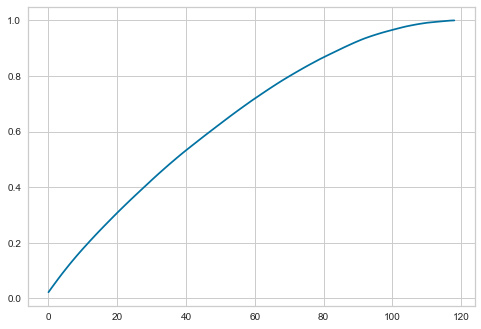

In [83]:
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.show()

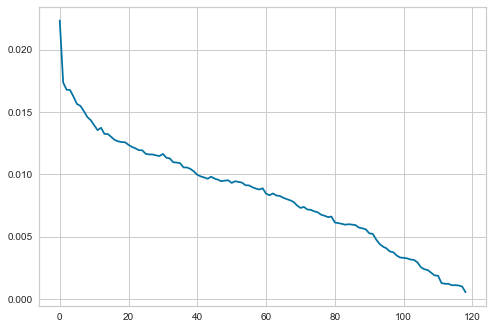

In [84]:
plt.plot(svd.explained_variance_ratio_)
plt.show()

In [85]:
svd = TruncatedSVD(random_state=4, n_components=120)
svd.fit(rest_rating_pivot)

TruncatedSVD(n_components=120, random_state=4)

In [86]:
rest_rating_svd = svd.fit_transform(rest_rating_pivot)

In [87]:
rest_rating_svd.shape

(119, 119)

In [88]:
corr = np.corrcoef(rest_rating_svd)
corr.shape

(119, 119)

In [89]:
rest_title = rest_rating_pivot.index
rest_list = list(rest_title)
#rest_list
rest_t = rest_list.index('Apna Punjab')
rest_t

10

In [90]:
corr_book_t = corr[rest_t]

In [91]:
rest_title[(corr_book_t)>0]

Index(['Apna Punjab', 'Cucumber Town', 'Kairali', 'Punjabi Swag'], dtype='object', name='name')

![](p13.png)

# Association Based Recomendation System 

![](p16.jpeg)

In [92]:
dt['location'].value_counts().tail(30)

ITPL Main Road, Whitefield    78
City Market                   75
Hosur Road                    72
Vijay Nagar                   62
RT Nagar                      60
CV Raman Nagar                60
Sadashiv Nagar                58
Sanjay Nagar                  48
Sahakara Nagar                45
Koramangala                   30
East Bangalore                28
Langford Town                 27
Sankey Road                   26
Rammurthy Nagar               26
Magadi Road                   24
Jalahalli                     23
Old Madras Road               22
Kanakapura Road               19
Mysore Road                   17
KR Puram                      10
North Bangalore               10
Uttarahalli                    9
Kengeri                        8
Central Bangalore              8
Hebbal                         8
Yelahanka                      4
West Bangalore                 3
Rajarajeshwari Nagar           2
Nagarbhavi                     1
Peenya                         1
Name: loca

In [104]:
dt=zomato_real.copy()
dt.head()
dt.drop(['url','menu_item'],axis=1,inplace=True)
dfa=dt.loc[dt['location']=='East Bangalore']
dfa.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
3878,Delivery Only,Costa Biryanis,Yes,No,3.3/5,10,+91 9900733330,East Bangalore,Delivery,NaN,"Andhra, Biryani, North Indian, South Indian",300,"[('Rated 1.0', 'RATED\n I received mutton ins...",Delivery,Bellandur
4353,Delivery Only,La-Pizza,Yes,No,3.6/5,151,+91 9611311662,East Bangalore,Delivery,"Pasta, Burgers, Farm Pizza, Fries","Italian, Pizza, Burger",450,"[('Rated 3.0', 'RATED\n Expectations were hig...",Delivery,Bellandur
6818,Delivery Only,La-Pizza,Yes,No,3.6/5,151,+91 9611311662,East Bangalore,Delivery,"Pasta, Burgers, Farm Pizza, Fries","Italian, Pizza, Burger",450,"[('Rated 3.0', 'RATED\n Expectations were hig...",Delivery,Brookefield
7213,Delivery Only,Supreme Biryani,No,No,NaN,0,+91 9606441695,East Bangalore,"Takeaway, Delivery",NaN,Biryani,400,"[('Rated 5.0', 'RATED\n Too yammy biryani I l...",Delivery,Brookefield
7367,Delivery Only,Costa Biryanis,Yes,No,3.3/5,10,+91 9900733330,East Bangalore,Delivery,NaN,"Andhra, Biryani, North Indian, South Indian",300,"[('Rated 1.0', 'RATED\n I received mutton ins...",Delivery,Brookefield


In [105]:
df4=dfa.dish_liked

In [106]:
df4=pd.DataFrame(df4)

In [141]:
df4

,dish_liked
1798,"Pasta, Burgers, Farm Pizza, Fries"
3040,"Pasta, Burgers, Farm Pizza, Fries"
8064,"Burgers, Nachos, Fries, Peri Peri Prawn, Fish,..."
18267,"Pasta, Burgers, Farm Pizza, Fries"
18323,"Burgers, Pizza, Biryani"
20199,"Salads, Burgers, Sandwiches, Pizza, Pasta, Fis..."
20425,"Burgers, Nachos, Fries, Peri Peri Prawn, Fish,..."
22153,"Burgers, Ghee Roast Chicken Biryani"


In [142]:
unique_row_items = []
for index, row in df4.iterrows():
    items_series = list(row.str.split(','))
    for item_serie in items_series:
        for item in item_serie:
            if item not in unique_row_items:
                unique_row_items.append(item)

unique_row_items

['Pasta',
 ' Burgers',
 ' Farm Pizza',
 ' Fries',
 'Burgers',
 ' Nachos',
 ' Peri Peri Prawn',
 ' Fish',
 ' Virgin Mojito',
 ' Chips',
 ' Pizza',
 ' Biryani',
 'Salads',
 ' Sandwiches',
 ' Pasta',
 ' Salad',
 ' Ghee Roast Chicken Biryani']

In [143]:
df_apriori = pd.DataFrame(columns=unique_row_items)
df_apriori

,Pasta,Burgers,Farm Pizza,Fries,Burgers,Nachos,Peri Peri Prawn,Fish,Virgin Mojito,Chips,Pizza,Biryani,Salads,Sandwiches,Pasta,Salad,Ghee Roast Chicken Biryani


In [145]:

for index, row in df4.iterrows():
    items = str(row[0]).split(',')
    print(items)
    one_hot_encoding = np.zeros(len(unique_row_items),dtype=int)
    for it in items:
        for i,column in enumerate(df_apriori.columns):
            print(i,column,it)
            if it == column:
                one_hot_encoding[i] = 1
    df_apriori.at[index] = one_hot_encoding
    #print(one_hot_encoding)


['Pasta', ' Burgers', ' Farm Pizza', ' Fries']
0 Pasta Pasta
1  Burgers Pasta
2  Farm Pizza Pasta
3  Fries Pasta
4 Burgers Pasta
5  Nachos Pasta
6  Peri Peri Prawn Pasta
7  Fish Pasta
8  Virgin Mojito Pasta
9  Chips Pasta
10  Pizza Pasta
11  Biryani Pasta
12 Salads Pasta
13  Sandwiches Pasta
14  Pasta Pasta
15  Salad Pasta
16  Ghee Roast Chicken Biryani Pasta
0 Pasta  Burgers
1  Burgers  Burgers
2  Farm Pizza  Burgers
3  Fries  Burgers
4 Burgers  Burgers
5  Nachos  Burgers
6  Peri Peri Prawn  Burgers
7  Fish  Burgers
8  Virgin Mojito  Burgers
9  Chips  Burgers
10  Pizza  Burgers
11  Biryani  Burgers
12 Salads  Burgers
13  Sandwiches  Burgers
14  Pasta  Burgers
15  Salad  Burgers
16  Ghee Roast Chicken Biryani  Burgers
0 Pasta  Farm Pizza
1  Burgers  Farm Pizza
2  Farm Pizza  Farm Pizza
3  Fries  Farm Pizza
4 Burgers  Farm Pizza
5  Nachos  Farm Pizza
6  Peri Peri Prawn  Farm Pizza
7  Fish  Farm Pizza
8  Virgin Mojito  Farm Pizza
9  Chips  Farm Pizza
10  Pizza  Farm Pizza
11  Biryani  Fa

In [147]:
df_apriori.head()

,Pasta,Burgers,Farm Pizza,Fries,Burgers,Nachos,Peri Peri Prawn,Fish,Virgin Mojito,Chips,Pizza,Biryani,Salads,Sandwiches,Pasta,Salad,Ghee Roast Chicken Biryani
1798,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3040,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8064,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0
18267,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
18323,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0


In [148]:
df_apriori.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 1798 to 22153
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Pasta                        8 non-null      object
 1    Burgers                     8 non-null      object
 2    Farm Pizza                  8 non-null      object
 3    Fries                       8 non-null      object
 4   Burgers                      8 non-null      object
 5    Nachos                      8 non-null      object
 6    Peri Peri Prawn             8 non-null      object
 7    Fish                        8 non-null      object
 8    Virgin Mojito               8 non-null      object
 9    Chips                       8 non-null      object
 10   Pizza                       8 non-null      object
 11   Biryani                     8 non-null      object
 12  Salads                       8 non-null      object
 13   Sandwiches                  8 n

In [151]:
df_apriori=df_apriori.astype('int')

In [152]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [153]:
freq_items = apriori(df_apriori, min_support = 0.2, use_colnames = True, verbose = 1)

Processing 7 combinations | Sampling itemset size 7


In [154]:
freq_items

,support,itemsets
0,0.375,(Pasta)
1,0.500,( Burgers)
2,0.375,( Farm Pizza)
3,0.625,( Fries)
4,0.500,(Burgers)
...,...,...
137,0.250,"( Chips, Nachos, Burgers, Fries, Fish, Vir..."
138,0.250,"( Peri Peri Prawn, Chips, Burgers, Fries, F..."
139,0.250,"( Peri Peri Prawn, Chips, Nachos, Fries, F..."
140,0.250,"( Peri Peri Prawn, Chips, Nachos, Burgers, ..."


In [155]:
freq_items.head()

,support,itemsets
0,0.375,(Pasta)
1,0.500,( Burgers)
2,0.375,( Farm Pizza)
3,0.625,( Fries)
4,0.500,(Burgers)


In [162]:
df_association_rules = association_rules(freq_items, metric = "confidence", min_threshold = 0.2)
df_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( Burgers),(Pasta),0.500,0.375,0.375,0.750000,2.000000,0.187500,2.5000
1,(Pasta),( Burgers),0.375,0.500,0.375,1.000000,2.000000,0.187500,inf
2,( Farm Pizza),(Pasta),0.375,0.375,0.375,1.000000,2.666667,0.234375,inf
3,(Pasta),( Farm Pizza),0.375,0.375,0.375,1.000000,2.666667,0.234375,inf
4,( Fries),(Pasta),0.625,0.375,0.375,0.600000,1.600000,0.140625,1.5625
...,...,...,...,...,...,...,...,...,...
1977,( Nachos),"( Peri Peri Prawn, Chips, Burgers, Fries, F...",0.250,0.250,0.250,1.000000,4.000000,0.187500,inf
1978,(Burgers),"( Peri Peri Prawn, Chips, Nachos, Fries, F...",0.500,0.250,0.250,0.500000,2.000000,0.125000,1.5000
1979,( Fries),"( Peri Peri Prawn, Chips, Nachos, Burgers, ...",0.625,0.250,0.250,0.400000,1.600000,0.093750,1.2500
1980,( Fish),"( Peri Peri Prawn, Chips, Nachos, Burgers, ...",0.375,0.250,0.250,0.666667,2.666667,0.156250,2.2500


In [163]:
df_association_rules["antecedents"].apply(lambda x: str(x))

0             frozenset({' Burgers'})
1                frozenset({'Pasta'})
2          frozenset({' Farm Pizza'})
3                frozenset({'Pasta'})
4               frozenset({' Fries'})
                    ...              
1977           frozenset({' Nachos'})
1978           frozenset({'Burgers'})
1979            frozenset({' Fries'})
1980             frozenset({' Fish'})
1981    frozenset({' Virgin Mojito'})
Name: antecedents, Length: 1982, dtype: object

In [164]:
cols = ['antecedents','consequents']
df_association_rules[cols] = df_association_rules[cols].applymap(lambda x: tuple(x))
print (df_association_rules)

            antecedents                                        consequents  \
0           ( Burgers,)                                           (Pasta,)   
1              (Pasta,)                                        ( Burgers,)   
2        ( Farm Pizza,)                                           (Pasta,)   
3              (Pasta,)                                     ( Farm Pizza,)   
4             ( Fries,)                                           (Pasta,)   
...                 ...                                                ...   
1977         ( Nachos,)  ( Peri Peri Prawn,  Chips, Burgers,  Fries,  F...   
1978         (Burgers,)  ( Peri Peri Prawn,  Chips,  Nachos,  Fries,  F...   
1979          ( Fries,)  ( Peri Peri Prawn,  Chips,  Nachos, Burgers,  ...   
1980           ( Fish,)  ( Peri Peri Prawn,  Chips,  Nachos, Burgers,  ...   
1981  ( Virgin Mojito,)  ( Peri Peri Prawn,  Chips,  Nachos, Burgers,  ...   

      antecedent support  consequent support  support  confiden

In [166]:
df_association_rules = (df_association_rules.explode('antecedents')
         .reset_index(drop=True)
         .explode('consequents')
         .reset_index(drop=True))

In [167]:
df_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,Burgers,Pasta,0.500,0.375,0.375,0.75,2.000000,0.187500,2.5000
1,Pasta,Burgers,0.375,0.500,0.375,1.00,2.000000,0.187500,inf
2,Farm Pizza,Pasta,0.375,0.375,0.375,1.00,2.666667,0.234375,inf
3,Pasta,Farm Pizza,0.375,0.375,0.375,1.00,2.666667,0.234375,inf
4,Fries,Pasta,0.625,0.375,0.375,0.60,1.600000,0.140625,1.5625
...,...,...,...,...,...,...,...,...,...
10309,Virgin Mojito,Chips,0.250,0.250,0.250,1.00,4.000000,0.187500,inf
10310,Virgin Mojito,Nachos,0.250,0.250,0.250,1.00,4.000000,0.187500,inf
10311,Virgin Mojito,Burgers,0.250,0.250,0.250,1.00,4.000000,0.187500,inf
10312,Virgin Mojito,Fries,0.250,0.250,0.250,1.00,4.000000,0.187500,inf


In [168]:
df_association_rules["product_group"] = df_association_rules["antecedents"].apply(lambda x: str(x)) + "," + df_association_rules["consequents"].apply(lambda x: str(x))

In [169]:
df_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,product_group
0,Burgers,Pasta,0.500,0.375,0.375,0.75,2.000000,0.187500,2.5000,"Burgers,Pasta"
1,Pasta,Burgers,0.375,0.500,0.375,1.00,2.000000,0.187500,inf,"Pasta, Burgers"
2,Farm Pizza,Pasta,0.375,0.375,0.375,1.00,2.666667,0.234375,inf,"Farm Pizza,Pasta"
3,Pasta,Farm Pizza,0.375,0.375,0.375,1.00,2.666667,0.234375,inf,"Pasta, Farm Pizza"
4,Fries,Pasta,0.625,0.375,0.375,0.60,1.600000,0.140625,1.5625,"Fries,Pasta"
...,...,...,...,...,...,...,...,...,...,...
10309,Virgin Mojito,Chips,0.250,0.250,0.250,1.00,4.000000,0.187500,inf,"Virgin Mojito, Chips"
10310,Virgin Mojito,Nachos,0.250,0.250,0.250,1.00,4.000000,0.187500,inf,"Virgin Mojito, Nachos"
10311,Virgin Mojito,Burgers,0.250,0.250,0.250,1.00,4.000000,0.187500,inf,"Virgin Mojito,Burgers"
10312,Virgin Mojito,Fries,0.250,0.250,0.250,1.00,4.000000,0.187500,inf,"Virgin Mojito, Fries"


In [189]:
df1 = df_association_rules.loc[:,["product_group","confidence","lift","support"]].sort_values(['lift'],ascending=[False])

In [190]:
df1.head()

,product_group,confidence,lift,support
5157,"Fish,Burgers",1.0,4.0,0.25
6821,"Chips,Burgers",1.0,4.0,0.25
6814,"Chips, Virgin Mojito",1.0,4.0,0.25
6815,"Chips, Fries",1.0,4.0,0.25
6816,"Nachos, Peri Peri Prawn",1.0,4.0,0.25


![](p14.png)

# Content Based Recommedation System

![](p10.png)

In [110]:
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city', 'Mean Rating'],
      dtype='object')

In [111]:
zomato=zomato.drop(['address','rest_type', 'type', 'menu_item', 'votes'],axis=1)

In [112]:
import pandas

# Randomly sample 60% of your dataframe
df_percent = zomato.sample(frac=0.5)

In [113]:
df_percent.shape

(20618, 10)

### Term Frequency-Inverse Document Frequency
Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each document. This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each column represents a restaurant, as before.

TF-IDF is the statistical method of evaluating the significance of a word in a given document.

TF — Term frequency(tf) refers to how many times a given term appears in a document.

IDF — Inverse document frequency(idf) measures the weight of the word in the document, i.e if the word is common or rare in the entire document.
The TF-IDF intuition follows that the terms that appear frequently in a document are less important than terms that rarely appear.
Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix quite easily.

In [114]:
df_percent.set_index('name', inplace=True)

In [115]:
indices = pd.Series(df_percent.index)

In [116]:
# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_percent['reviews_list'])

In [117]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [118]:
def recommend(name, cosine_similarities = cosine_similarities):
    
    # Create a list to put top 10 restaurants
    recommend_restaurant = []
    
    # Find the index of the hotel entered
    idx = indices[indices == name].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)
    
    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df_percent.index)[each])
    
    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['cuisines', 'Mean Rating', 'cost'])
    
    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(df_percent[['cuisines','Mean Rating', 'cost']][df_percent.index == each].sample()))
    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['cuisines','Mean Rating', 'cost'], keep=False)
    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(10)
    
    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))
    
    return df_new

In [119]:
# HERE IS A RANDOM RESTAURANT. LET'S SEE THE DETAILS ABOUT THIS RESTAURANT:
df_percent[df_percent.index == 'Pai Vihar'].head()

,online_order,book_table,rate,location,cuisines,cost,reviews_list,city,Mean Rating
name,,,,,,,,,
Pai Vihar,False,False,3.3,City Market,"South Indian, Street Food, Chinese, Fast Food",400.0,rated 20 ratedn food dry bland dont understand...,Residency Road,2.48
Pai Vihar,True,False,2.8,Vasanth Nagar,"South Indian, Street Food, Chinese, Fast Food",400.0,rated 30 ratedn 12 rate hereãx83ãx83ãx82ãx...,MG Road,2.48
Pai Vihar,True,False,2.8,Vasanth Nagar,"South Indian, Street Food, Chinese, Fast Food",400.0,rated 30 ratedn 12 rate herenneven though tast...,Frazer Town,2.48
Pai Vihar,False,False,3.2,City Market,"South Indian, Street Food, Chinese, Fast Food",400.0,rated 20 ratedn food dry bland dont understand...,Church Street,2.48
Pai Vihar,False,False,2.8,Vasanth Nagar,"South Indian, Street Food, Chinese, Fast Food",400.0,rated 30 ratedn 12 rate hereãx83ãx83ãx82ãx...,Residency Road,2.48


In [120]:
recommend('Pai Vihar')

TOP 8 RESTAURANTS LIKE Pai Vihar WITH SIMILAR REVIEWS: 


,cuisines,Mean Rating,cost
Chianti,Italian,4.59,1500.0
Lavonne,"Cafe, Desserts",4.35,800.0
Foxtrot - House Of Subculture,"Cafe, American, Asian, North Indian",4.35,1000.0
The Lantern Restaurant & Bar - The Ritz-Carlton...,Chinese,4.28,3500.0
Hotel Tom'S Restaurant,"Mangalorean, Seafood, Chinese, North Indian",4.15,1000.0
Forage,"Healthy Food, Beverages, European, Salad",4.03,1500.0
Dum Biryani Hub,Biryani,3.71,700.0
Karavali Grand,"Mangalorean, Seafood, North Indian, Chinese",3.45,600.0


![](p15.png)

![](p16.png)

![](p17.png)

![](p18.png)